In [1]:
# TASK 1: Analysis of step-one performance retrieval.
# First thing, start easy: build two-indexes, evaluate them top-m retrievals
# Hit-once and Hit-all. Then see other metrics like precision & recall + Roni's analysis.
# from google.colab import drive
# drive.mount('/content/drive')
# cleaning sample_data directory
# !rm -r sample_data

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the csv file
stats500 = pd.read_csv('../social_simulation_seminar/models/test_2.csv.csv')
stats600 = pd.read_csv('../social_simulation_seminar/models/cars600.csv')
stats300 = pd.read_csv('../social_simulation_seminar/models/cars300.csv')

In [4]:
all_stats500 = stats500[(stats500['wants-to-park']==True) & (stats500['price-paid']!= -99)]
all_stats600 = stats600[(stats600['wants-to-park']==True) & (stats600['price-paid']!= -99)]
all_stats300 = stats300[(stats300['wants-to-park']==True) & (stats300['price-paid']!= -99)]

In [5]:
strategy500 = all_stats500.groupby('agent-strategy-flag').mean().reset_index()
strategy500 = strategy500.rename(columns = {'agent-strategy-flag':'Strategy', 'utility-value':'Avg Utility'})
strategy500

,Strategy,id,income,income-group,wtp,parking-offender?,distance-parking-target,price-paid,search-time,wants-to-park,die?,reinitialize?,Avg Utility,mean-utility,informed-flag,wait-time,park-time,switch-strategy-flag
0,1,2624.288889,31023.579236,1.000000,4.751396,0.288889,15.785868,4.744444,598.155556,1.0,1.0,1.0,-0.126207,-0.290388,1.466667,0.0,3484.259903,0.0000
1,2,1830.960000,26033.900209,0.840000,4.242904,0.120000,13.120309,5.100000,536.360000,1.0,1.0,1.0,-0.127682,-0.292458,1.640000,0.0,3782.272678,0.0000
2,3,2579.200000,28475.627262,0.950000,5.153455,0.150000,16.161029,4.137500,560.300000,1.0,1.0,1.0,-0.181398,-0.288790,1.650000,0.0,3134.391996,0.0000
3,4,2018.150000,28505.290961,0.950000,5.252856,0.350000,18.183581,4.062500,555.000000,1.0,1.0,1.0,-0.148802,-0.297077,1.450000,0.0,3727.083706,0.0000
4,5,2462.812500,28301.233167,1.000000,5.169986,0.125000,19.595101,3.250000,556.187500,1.0,1.0,1.0,-0.141194,-0.286487,1.437500,0.0,3865.997383,0.0625
5,6,1992.282609,27748.360845,0.869565,4.370815,0.282609,19.180683,4.141304,486.652174,1.0,1.0,1.0,-0.174540,-0.292752,0.000000,0.0,3302.891630,0.0000
6,7,2359.764706,29760.416196,0.882353,4.592880,0.352941,27.973333,2.323529,593.705882,1.0,1.0,1.0,-0.101765,-0.294054,0.000000,0.0,3189.505575,0.0000


In [6]:
strategy600 = all_stats600.groupby('agent-strategy-flag').mean().reset_index()
strategy600 = strategy600.rename(columns = {'agent-strategy-flag':'Strategy', 'utility-value':'Avg Utility'})
strategy600

,Strategy,id,income,income-group,wtp,parking-offender?,distance-parking-target,price-paid,search-time,wants-to-park,die?,reinitialize?,Avg Utility,mean-utility,informed-flag,wait-time,park-time,switch-strategy-flag
0,1.0,2828.930233,27713.216063,0.837209,4.260227,0.302326,15.752097,4.639535,643.534884,1.0,1.0,1.0,-0.170588,-0.270184,1.604651,0.0,3162.658163,0.0
1,2.0,2710.952381,29380.023132,0.952381,4.738486,0.238095,15.104357,3.678571,681.666667,1.0,1.0,1.0,-0.094506,-0.268248,1.333333,0.0,3611.182439,0.0
2,3.0,2042.416667,33253.231803,1.166667,5.147592,0.166667,18.718153,3.812500,656.333333,1.0,1.0,1.0,-0.246212,-0.267332,1.333333,0.0,4100.477816,0.0
3,4.0,2393.833333,25175.693021,0.777778,4.309675,0.305556,11.091041,4.548611,703.750000,1.0,1.0,1.0,-0.126387,-0.274053,1.611111,0.0,2968.580493,0.0
4,5.0,1630.416667,23623.166264,0.833333,4.784594,0.416667,26.162736,2.500000,767.333333,1.0,1.0,1.0,-0.056518,-0.279531,1.500000,0.0,3263.406983,0.0
5,6.0,2673.702703,29123.362938,0.864865,4.567902,0.351351,16.888887,3.641892,660.945946,1.0,1.0,1.0,-0.150971,-0.267697,0.000000,0.0,3741.699272,0.0
6,7.0,2911.000000,33554.930978,1.166667,5.405669,0.333333,19.368831,3.791667,614.333333,1.0,1.0,1.0,-0.012757,-0.272451,0.000000,0.0,2973.876584,0.0


In [7]:
strategy300 = all_stats300.groupby('agent-strategy-flag').mean().reset_index()
strategy300 = strategy300.rename(columns = {'agent-strategy-flag':'Strategy', 'utility-value':'Avg Utility'})
strategy300

,Strategy,id,income,income-group,wtp,parking-offender?,distance-parking-target,price-paid,search-time,wants-to-park,die?,reinitialize?,Avg Utility,mean-utility,informed-flag,wait-time,park-time,switch-strategy-flag
0,1,1677.333333,32754.544473,0.958333,4.853530,0.250000,15.134500,3.895833,417.375000,1.0,1.0,1.0,-0.080662,-0.281660,1.416667,0.0,4078.813466,0.0
1,2,1978.833333,30182.355931,0.916667,4.665560,0.250000,15.987819,4.812500,395.250000,1.0,1.0,1.0,-0.081015,-0.278898,1.333333,0.0,2586.658309,0.0
2,3,1986.235294,28556.258261,0.941176,4.875071,0.294118,19.012483,3.985294,391.411765,1.0,1.0,1.0,-0.229230,-0.285126,1.647059,0.0,3179.936983,0.0
3,4,2209.857143,33545.180516,1.000000,5.374990,0.357143,9.879676,5.910714,391.000000,1.0,1.0,1.0,-0.181203,-0.295089,1.500000,0.0,2315.715294,0.0
4,5,3512.250000,23565.840591,0.750000,3.927301,0.500000,22.681326,2.375000,325.000000,1.0,1.0,1.0,-0.049900,-0.295225,1.250000,0.0,2275.509725,0.0
5,6,2106.838710,28990.872943,0.903226,4.640824,0.096774,18.685350,3.241935,325.483871,1.0,1.0,1.0,-0.122821,-0.288535,0.000000,0.0,2776.786006,0.0
6,7,2179.333333,31820.467762,1.000000,5.328763,0.333333,24.939540,3.166667,255.500000,1.0,1.0,1.0,-0.108411,-0.285726,0.000000,0.0,3208.934617,0.0


Text(0.5, 1.0, 'Average Price Paid per Strategy')

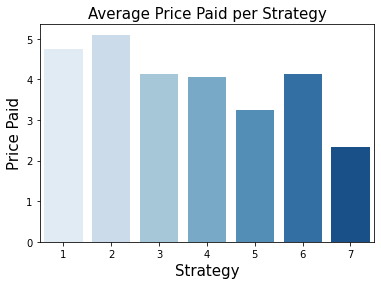

In [61]:
x = strategy500['Strategy']
y = strategy500['price-paid']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy500, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Price Paid', fontsize=15)
ax.set_title('Average Price Paid per Strategy', fontsize=15)
# ax.legend(labels=["SM","PRV", "DR", "NG", "AL", "UDR", "UAL"], title = "Strategies")

Text(0.5, 1.0, 'Average Price Paid per Strategy')

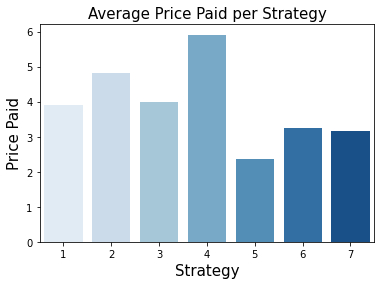

In [62]:
x = strategy300['Strategy']
y = strategy300['price-paid']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy300, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Price Paid', fontsize=15)
ax.set_title('Average Price Paid per Strategy', fontsize=15)
# ax.legend(labels=["SM","PRV", "DR", "NG", "AL", "UDR", "UAL"], title = "Strategies")

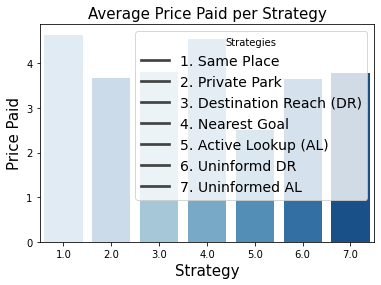

In [70]:
x = strategy600['Strategy']
y = strategy600['price-paid']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy600, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Price Paid', fontsize=15)
ax.set_title('Average Price Paid per Strategy', fontsize=15)
ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach (DR)", "4. Nearest Goal", "5. Active Lookup (AL)", "6. Uninformd DR", "7. Uninformed AL"], title = "Strategies", fontsize=14, ) # , loc = 2, bbox_to_anchor = (1,1)
# ax.legend(labels=["SM","PRV", "DR", "NG", "AL", "UDR", "UAL"], title = "Strategies")

Text(0.5, 1.0, 'Parking Offenders per Strategy')

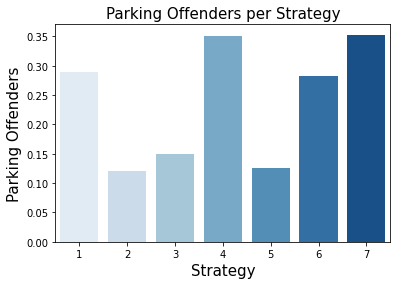

In [71]:
x = strategy500['Strategy']
y = strategy500['parking-offender?']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy500, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Parking Offenders', fontsize=15)
ax.set_title('Parking Offenders per Strategy', fontsize=15)
# ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach", "4. Nearest Goal", "5. Active Lookup ", "6. Uninformd Destination Reach", "7. Uninformed Active Lookup"], title = "Strategies", loc = 2, bbox_to_anchor = (1,1))

Text(0.5, 1.0, 'Parking Offenders per Strategy')

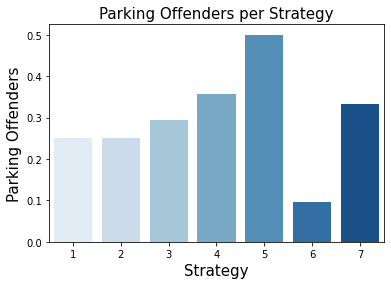

In [72]:
x = strategy300['Strategy']
y = strategy300['parking-offender?']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy300, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Parking Offenders', fontsize=15)
ax.set_title('Parking Offenders per Strategy', fontsize=15)
# ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach", "4. Nearest Goal", "5. Active Lookup ", "6. Uninformd Destination Reach", "7. Uninformed Active Lookup"], title = "Strategies", loc = 2, bbox_to_anchor = (1,1))

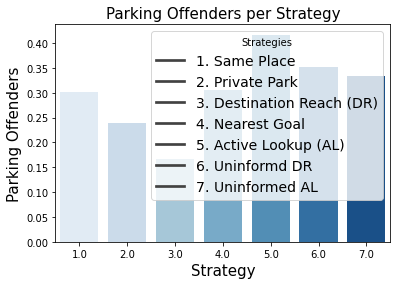

In [73]:
x = strategy600['Strategy']
y = strategy600['parking-offender?']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy600, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Parking Offenders', fontsize=15)
ax.set_title('Parking Offenders per Strategy', fontsize=15)
ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach (DR)", "4. Nearest Goal", "5. Active Lookup (AL)", "6. Uninformd DR", "7. Uninformed AL"], title = "Strategies", loc = 1, fontsize=14) # , loc = 2, bbox_to_anchor = (1,1)
# ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach", "4. Nearest Goal", "5. Active Lookup ", "6. Uninformd Destination Reach", "7. Uninformed Active Lookup"], title = "Strategies", loc = 2, bbox_to_anchor = (1,1))

Text(0.5, 1.0, 'Average Utility per Strategy')

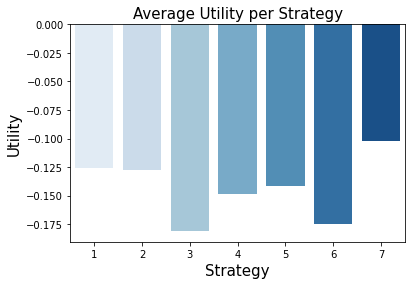

In [10]:
x = strategy500['Strategy']
y = strategy500['Avg Utility']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy500, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Utility', fontsize=15)
ax.set_title('Average Utility per Strategy', fontsize=15)

Text(0.5, 1.0, 'Average Utility per Strategy')

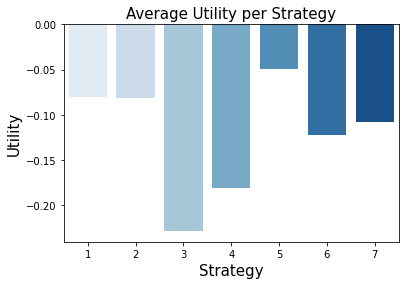

In [11]:
x = strategy300['Strategy']
y = strategy300['Avg Utility']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy300, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Utility', fontsize=15)
ax.set_title('Average Utility per Strategy', fontsize=15)

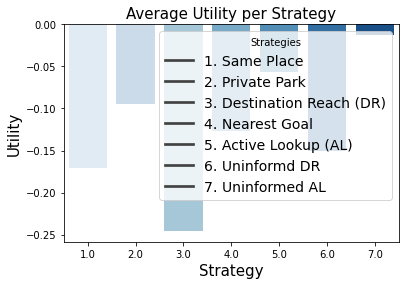

In [8]:
x = strategy600['Strategy']
y = strategy600['Avg Utility']
ax = sns.set_palette(palette='Blues')
ax = sns.barplot(x=x, y=y, data=strategy600, palette='Blues')
ax.set_xlabel('Strategy', fontsize=15)
ax.set_ylabel('Utility', fontsize=15)
ax.set_title('Average Utility per Strategy', fontsize=15)
ax.legend(labels=["1. Same Place","2. Private Park", "3. Destination Reach (DR)", "4. Nearest Goal", "5. Active Lookup (AL)", "6. Uninformd DR", "7. Uninformed AL"], title = "Strategies", loc = 1, fontsize=14) # , loc = 2, bbox_to_anchor = (1,1)